In [16]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import calendar

# --- Tickers ---
tickers = [
    "360ONE.NS", "ABB.NS", "APLAPOLLO.NS", "AUBANK.NS", "ADANIENSOL.NS", "ADANIENT.NS",
    "ADANIGREEN.NS", "ADANIPORTS.NS", "ABCAPITAL.NS", "ALKEM.NS", "AMBER.NS", "AMBUJACEM.NS",
    "ANGELONE.NS", "APOLLOHOSP.NS", "ASHOKLEY.NS", "ASIANPAINT.NS", "ASTRAL.NS", "AUROPHARMA.NS",
    "DMART.NS", "AXISBANK.NS", "BSE.NS", "BAJAJ-AUTO.NS", "BAJFINANCE.NS", "BAJAJFINSV.NS",
    "BANDHANBNK.NS", "BANKBARODA.NS", "BANKINDIA.NS", "BDL.NS", "BEL.NS", "BHARATFORG.NS",
    "BHEL.NS", "BPCL.NS", "BHARTIARTL.NS", "BIOCON.NS", "BLUESTARCO.NS", "BOSCHLTD.NS",
    "BRITANNIA.NS", "CGPOWER.NS", "CANBK.NS", "CDSL.NS", "CHOLAFIN.NS", "CIPLA.NS", "COALINDIA.NS",
    "COFORGE.NS", "COLPAL.NS", "CAMS.NS", "CONCOR.NS", "CROMPTON.NS", "CUMMINSIND.NS", "CYIENT.NS",
    "DLF.NS", "DABUR.NS", "DALBHARAT.NS", "DELHIVERY.NS", "DIVISLAB.NS", "DIXON.NS", "DRREDDY.NS",
    "ETERNAL.NS", "EICHERMOT.NS", "EXIDEIND.NS", "NYKAA.NS", "FORTIS.NS", "GAIL.NS", "GMRAIRPORT.NS",
    "GLENMARK.NS", "GODREJCP.NS", "GODREJPROP.NS", "GRASIM.NS", "HCLTECH.NS", "HDFCAMC.NS", 
    "HDFCBANK.NS", "HDFCLIFE.NS", "HFCL.NS", "HAVELLS.NS", "HEROMOTOCO.NS", "HINDALCO.NS", "HAL.NS",
    "HINDPETRO.NS", "HINDUNILVR.NS", "HINDZINC.NS", "POWERINDIA.NS", "HUDCO.NS", "ICICIBANK.NS",
    "ICICIGI.NS", "ICICIPRULI.NS", "IDFCFIRSTB.NS", "IIFL.NS", "ITC.NS", "INDIANB.NS", "IEX.NS",
    "IOC.NS", "IRCTC.NS", "IRFC.NS", "IREDA.NS", "IGL.NS", "INDUSTOWER.NS", "INDUSINDBK.NS",
    "NAUKRI.NS", "INFY.NS", "INOXWIND.NS", "INDIGO.NS", "JINDALSTEL.NS", "JSWENERGY.NS", 
    "JSWSTEEL.NS", "JIOFIN.NS", "JUBLFOOD.NS", "KEI.NS", "KPITTECH.NS", "KALYANKJIL.NS", 
    "KAYNES.NS", "KFINTECH.NS", "KOTAKBANK.NS", "LTF.NS", "LICHSGFIN.NS", "LTIM.NS", "LT.NS",
    "LAURUSLABS.NS", "LICI.NS", "LODHA.NS", "LUPIN.NS", "M&M.NS", "MANAPPURAM.NS", "MANKIND.NS",
    "MARICO.NS", "MARUTI.NS", "MFSL.NS", "MAXHEALTH.NS", "MAZDOCK.NS", "MPHASIS.NS", "MCX.NS",
    "MUTHOOTFIN.NS", "NBCC.NS", "NCC.NS", "NHPC.NS", "NMDC.NS", "NTPC.NS", "NATIONALUM.NS",
    "NESTLEIND.NS", "NUVAMA.NS", "OBEROIRLTY.NS", "ONGC.NS", "OIL.NS", "PAYTM.NS", "OFSS.NS",
    "POLICYBZR.NS", "PGEL.NS", "PIIND.NS", "PNBHOUSING.NS", "PAGEIND.NS", "PATANJALI.NS",
    "PERSISTENT.NS", "PETRONET.NS", "PIDILITIND.NS", "PPLPHARMA.NS", "POLYCAB.NS", "PFC.NS",
    "POWERGRID.NS", "PRESTIGE.NS", "PNB.NS", "RBLBANK.NS", "RECLTD.NS", "RVNL.NS", "RELIANCE.NS",
    "SBICARD.NS", "SBILIFE.NS", "SHREECEM.NS", "SRF.NS", "SAMMAANCAP.NS", "MOTHERSON.NS",
    "SHRIRAMFIN.NS", "SIEMENS.NS", "SOLARINDS.NS", "SONACOMS.NS", "SBIN.NS", "SAIL.NS", 
    "SUNPHARMA.NS", "SUPREMEIND.NS", "SUZLON.NS", "SYNGENE.NS", "TATACONSUM.NS", "TITAGARH.NS",
    "TVSMOTOR.NS", "TCS.NS", "TATAELXSI.NS", "TATAMOTORS.NS", "TATAPOWER.NS", "TATASTEEL.NS",
    "TATATECH.NS", "TECHM.NS", "FEDERALBNK.NS", "INDHOTEL.NS", "PHOENIXLTD.NS", "TITAN.NS",
    "TORNTPHARM.NS", "TORNTPOWER.NS", "TRENT.NS", "TIINDIA.NS", "UNOMINDA.NS", "UPL.NS",
    "ULTRACEMCO.NS", "UNIONBANK.NS", "VBL.NS", "VEDL.NS", "IDEA.NS", "VOLTAS.NS",
    "WIPRO.NS", "YESBANK.NS", "ZYDUSLIFE.NS"
]

start_date = "2020-01-01"
end_date = datetime.today().strftime("%Y-%m-%d")
momentum_lookback_days = 240
rebalance_freq = 'ME'
uptrend_sma_short = 50
uptrend_sma_long = 200
uptrend_threshold = 0.5


print("Downloading NIFTY component data...")
data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker', progress=True)
adj = pd.DataFrame({t: data[t]['Close'] for t in tickers}).ffill().bfill()


print("Downloading NIFTY 50 index...")
nifty = yf.download("^NSEI", start=start_date, end=end_date, progress=False)['Close'].ffill()

[*********************100%***********************]  208 of 208 completed


In [17]:
# --- Indicators ---
sma50 = adj.rolling(uptrend_sma_short).mean()
sma200 = adj.rolling(uptrend_sma_long).mean()
momentum = adj / adj.shift(momentum_lookback_days) - 1

rebalance_dates = adj.index.to_series().resample(rebalance_freq).last().dropna()
rebalance_dates

Date
2020-01-31   2020-01-31
2020-02-29   2020-02-28
2020-03-31   2020-03-31
2020-04-30   2020-04-30
2020-05-31   2020-05-29
                ...    
2025-07-31   2025-07-31
2025-08-31   2025-08-29
2025-09-30   2025-09-30
2025-10-31   2025-10-31
2025-11-30   2025-11-06
Freq: ME, Name: Date, Length: 71, dtype: datetime64[ns]

In [18]:
# --- Backtest ---
positions = pd.DataFrame(0.0, index=adj.index, columns=tickers)
returns = pd.Series(0.0, index=adj.index)
current_weights = pd.Series(0.0, index=tickers)

for i, reb_day in enumerate(rebalance_dates):
    if reb_day not in adj.index:
        continue
    if adj.index.get_loc(reb_day) < momentum_lookback_days:
        continue

    uptrend = (adj.loc[reb_day] > sma200.loc[reb_day]) & (sma50.loc[reb_day] > sma200.loc[reb_day])
    pct_uptrend = uptrend.sum() / len(tickers)

    mom = momentum.loc[reb_day].dropna().sort_values(ascending=False)
    top10 = mom.head(10).index.tolist()

    weights = pd.Series(0.0, index=tickers)
    if pct_uptrend > uptrend_threshold and len(top10) > 0:
        weights.loc[top10] = 1 / len(top10)

    # Define period until next rebalance
    if i + 1 < len(rebalance_dates):
        next_day = rebalance_dates.iloc[i + 1]
        period = adj.loc[(adj.index >= reb_day) & (adj.index < next_day)]
    else:
        period = adj.loc[adj.index >= reb_day]

    daily_ret = period.pct_change().fillna(0)
    for d in period.index:
        returns.loc[d] = (daily_ret.loc[d] * weights).sum()
        positions.loc[d] = weights.values

pos_change = positions.diff().fillna(0)
trade_events = (pos_change != 0).sum().sum()
total_trades = int(trade_events / 2)


In [19]:
cumulative = (1 + returns).cumprod()
nifty_cum = (1 + nifty.pct_change().fillna(0)).cumprod()

years = (adj.index[-1] - adj.index[0]).days / 365.25

def perf_stats(series, risk_free_rate=0.06):
    """Return key performance metrics for a cumulative Series (handles DataFrame input)."""
    if isinstance(series, pd.DataFrame):
        series = series.iloc[:, 0]
    series = series.dropna()

    if len(series) < 2:
        return {"Total Return": np.nan, "CAGR": np.nan, "Vol": np.nan, "Sharpe": np.nan, "Max DD": np.nan}

    ret = series.pct_change().fillna(0)
    total_return = series.iloc[-1] / series.iloc[0] - 1
    cagr = (series.iloc[-1] / series.iloc[0]) ** (1 / years) - 1
    ann_vol = float(ret.std() * np.sqrt(252))

    # 6% risk-free rate adjusted Sharpe
    daily_rf = (1 + risk_free_rate) ** (1 / 252) - 1
    excess_daily = ret - daily_rf
    sharpe = (excess_daily.mean() * 252) / ann_vol if ann_vol != 0 else np.nan

    max_dd = float((series / series.cummax() - 1).min())

    return {
        "Total Return": total_return * 100,
        "CAGR": cagr * 100,
        "Vol": ann_vol * 100,
        "Sharpe": sharpe,
        "Max DD": max_dd * 100
    }

strategy_stats = perf_stats(cumulative, risk_free_rate=0.06)
nifty_stats = perf_stats(nifty_cum, risk_free_rate=0.06)

# --- Display ---
print("\n=== PERFORMANCE SUMMARY ===")
print(f"Period: {adj.index[0].date()} to {adj.index[-1].date()} ({years:.1f} years)")

print("\nStrategy Performance:")
for k, v in strategy_stats.items():
    print(f"  {k:<15}: {v:.4f}")
print(f"\nTotal Trades Executed: {total_trades}")

print("\nNIFTY 50 Performance:")
for k, v in nifty_stats.items():
    print(f"  {k:<15}: {v:.4f}")




=== PERFORMANCE SUMMARY ===
Period: 2020-01-01 to 2025-11-06 (5.8 years)

Strategy Performance:
  Total Return   : 418.2027
  CAGR           : 32.4883
  Vol            : 21.4237
  Sharpe         : 1.1717
  Max DD         : -20.3209

Total Trades Executed: 135

NIFTY 50 Performance:
  Total Return   : 109.3963
  CAGR           : 13.4710
  Vol            : 18.2848
  Sharpe         : 0.4773
  Max DD         : -38.4399


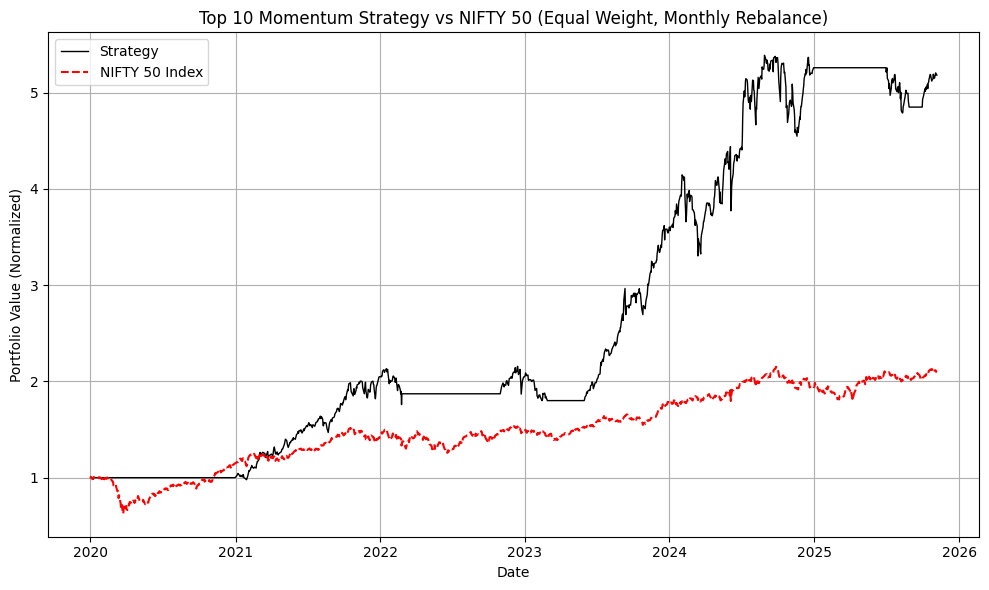

In [20]:
cumulative_norm = cumulative / cumulative.iloc[0]
nifty_norm = nifty_cum / nifty_cum.iloc[0]

plt.figure(figsize=(10,6))
plt.plot(cumulative_norm.index, cumulative_norm, label="Strategy", linewidth=1, color='black')
plt.plot(nifty_norm.index, nifty_norm, label="NIFTY 50 Index", linestyle='--', color='RED')
plt.title("Top 10 Momentum Strategy vs NIFTY 50 (Equal Weight, Monthly Rebalance)")
plt.xlabel("Date")
plt.ylabel("Portfolio Value (Normalized)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


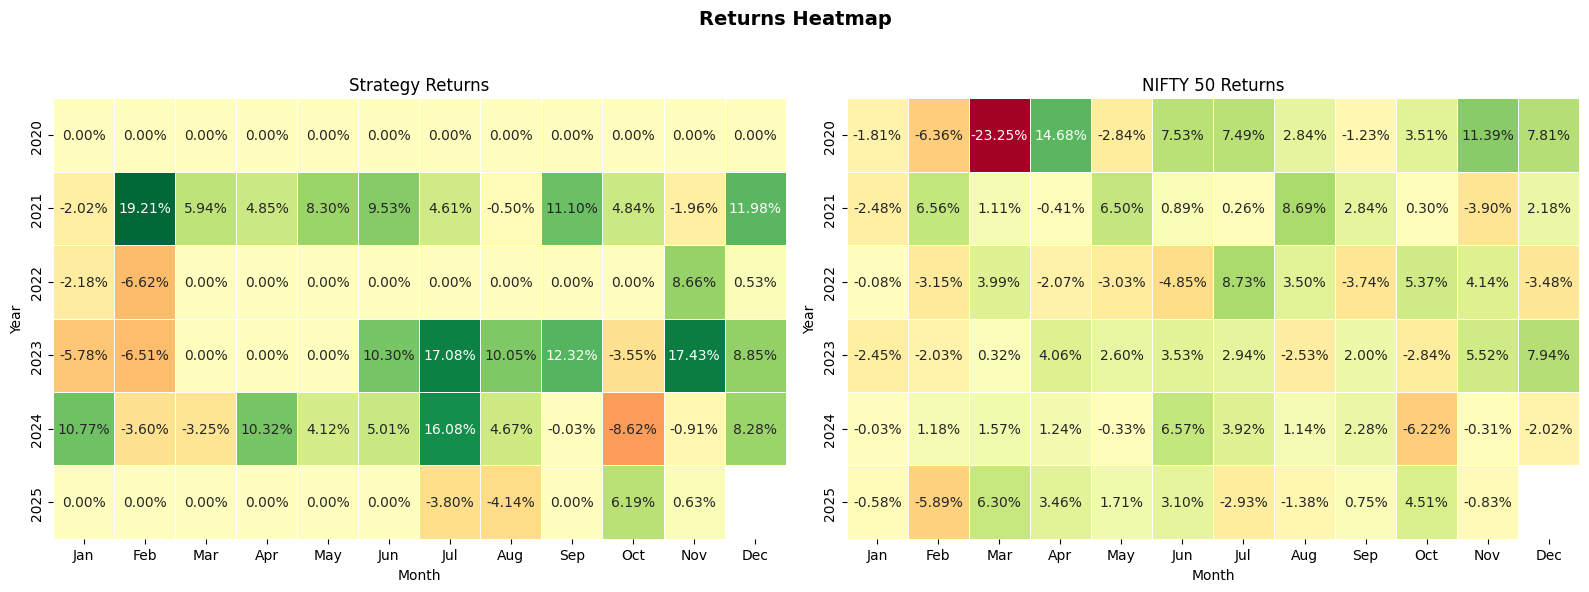

In [21]:
def monthly_returns(series):
    if isinstance(series, pd.DataFrame):
        series = series.iloc[:, 0]
    ret = series.pct_change().dropna()
    monthly = ret.resample("ME").apply(lambda x: (1 + x).prod() - 1)
    df = monthly.to_frame("Return")
    df["Year"] = df.index.year
    df["Month"] = df.index.month
    pivot = df.pivot(index="Year", columns="Month", values="Return")
    pivot = pivot.rename(columns={i: calendar.month_abbr[i] for i in range(1, 13)})
    return pivot



strategy_heat = monthly_returns(cumulative)
nifty_heat = monthly_returns(nifty_cum)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(strategy_heat, annot=True, fmt=".2%", cmap="RdYlGn", center=0,
            linewidths=0.5, cbar=False, ax=axes[0])
axes[0].set_title("Strategy Returns", fontsize=12)

sns.heatmap(nifty_heat, annot=True, fmt=".2%", cmap="RdYlGn", center=0,
            linewidths=0.5, cbar=False, ax=axes[1])
axes[1].set_title("NIFTY 50 Returns", fontsize=12)

for ax in axes:
    ax.set_xlabel("Month")
    ax.set_ylabel("Year")

plt.suptitle("Returns Heatmap", fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
